In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [92]:
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_array = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=diabetes_data.feature_names)
X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=diabetes_data.feature_names)

In [86]:
# Menggunakan Model KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Proses Training
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
# Prediksi
y_pred = knn.predict(X_test_scaled)

In [88]:
# Membandingkan Hasil Prediksi dengan Nilai Target (y_test)

# Tujuan:
#   - Untuk melihat apakah model KNN Regressor memprediksi label yang benar.
#   - Kita membuat DataFrame berisi dua kolom:
#       y_test  -> label asli (ground truth)
#       y_pred  -> label hasil prediksi model
#
# Ketika nilai y_test dan y_pred sama → prediksi benar.
# Ketika berbeda → prediksi salah.

comparison = pd.DataFrame({
    "y_test": y_test,   # nilai target asli dari data test
    "y_pred": y_pred    # hasil prediksi oleh model KNN
})

# Menampilkan 10 baris pertama agar mudah melihat pola hasil prediksi
comparison.head(10)

,y_test,y_pred
0,219.0,125.6
1,70.0,160.2
2,202.0,153.0
3,230.0,238.0
4,111.0,153.4
5,84.0,150.4
6,242.0,246.2
7,272.0,170.0
8,94.0,94.4
9,96.0,104.6


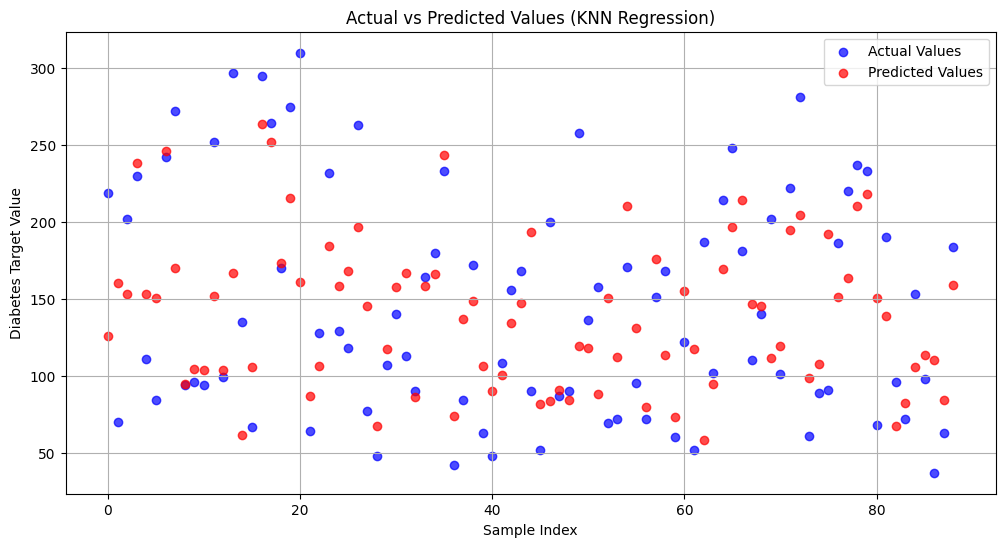

In [89]:
# Visualisasi

index = np.arange(len(y_test))  # index dari 0 sampai jumlah sample

plt.figure(figsize=(12,6))

plt.scatter(index, y_test, color="blue", label="Actual Values", alpha=0.7)
plt.scatter(index, y_pred, color="red", label="Predicted Values", alpha=0.7)

plt.xlabel("Sample Index")
plt.ylabel("Diabetes Target Value")
plt.title("Actual vs Predicted Values (KNN Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R2 Score: 0.42480887066066253
MSE: 3047.449887640449
RMSE: 55.203712625515045
MAE: 42.777528089887646


In [96]:
# Prediksi untuk satu sample baru 
sample = [
    0.03,  # age
    -0.02, # sex
    0.04,  # bmi
    0.03,  # bp
    -0.01, # s1
    -0.03, # s2
    -0.04, # s3
    0.02,  # s4
    0.01,  # s5
    -0.02  # s6
]
formatted_sample = pd.DataFrame([sample], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
single_prediction = knn.predict(formatted_sample)

print("Input Sample:", sample)
print("Hasil Prediksi:", single_prediction)

Input Sample: [0.03, -0.02, 0.04, 0.03, -0.01, -0.03, -0.04, 0.02, 0.01, -0.02]
Hasil Prediksi: [156.6]
